Model Coefficients:
Pregnancies: 0.2126
Glucose: 1.0713
BloodPressure: -0.2478
SkinThickness: 0.0457
Insulin: -0.2008
BMI: 0.7782
DiabetesPedigreeFunction: 0.2306
Age: 0.4212
Intercept: -0.8861
Accuracy on test set: 0.7532
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



/home/dman/master/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dman/master/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

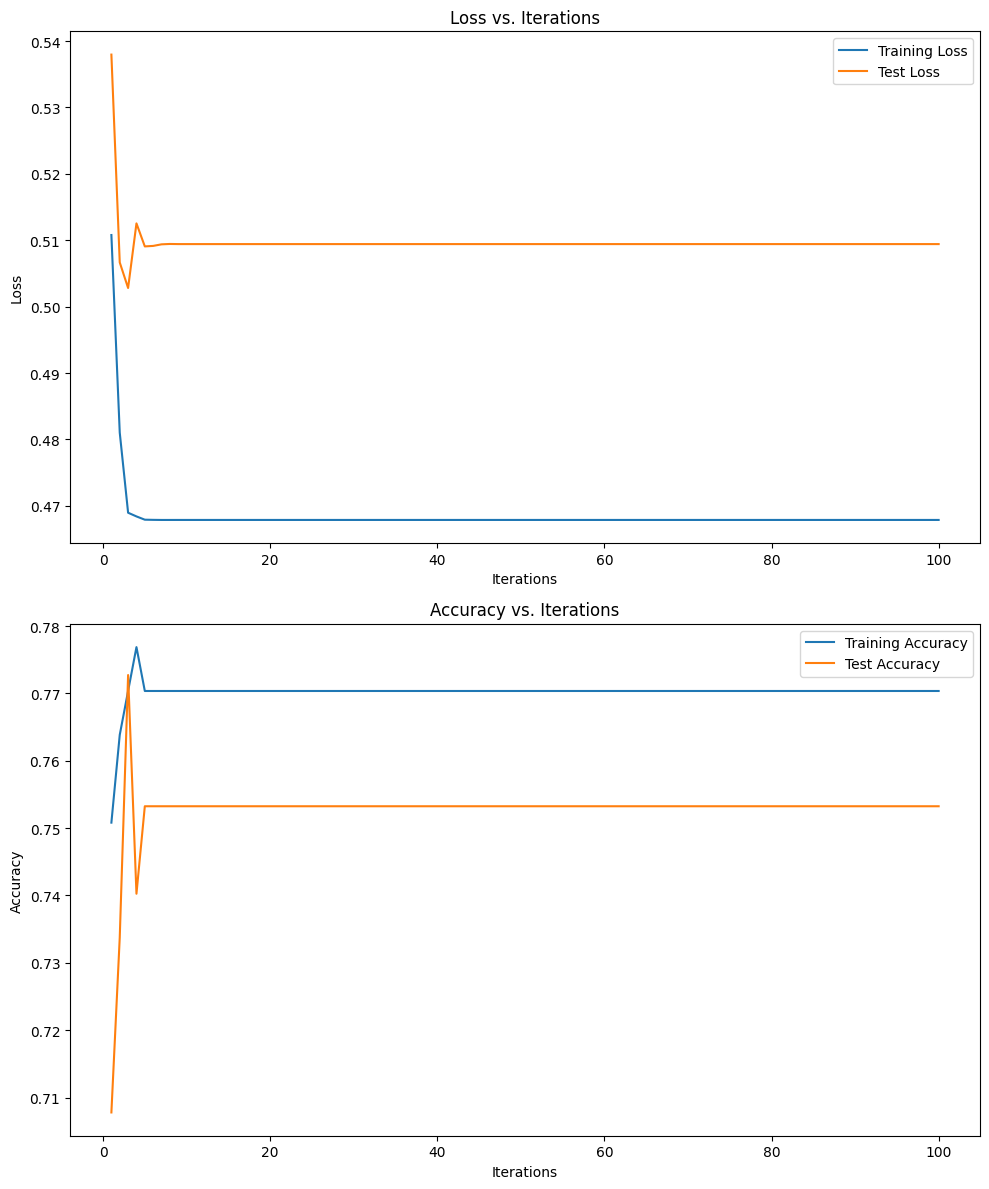

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, log_loss

# Load and preprocess data
df = pd.read_csv("assets/diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Print model coefficients and intercept
print("Model Coefficients:")
for feature, coef in zip(X_train.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")

# Evaluate model
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot loss and accuracy over iterations

# Create a range of iterations
iterations = range(1, 101)

# Initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Iterate through different numbers of iterations
for i in iterations:
    # Train the model with i iterations
    log_reg = LogisticRegression(random_state=42, max_iter=i)
    log_reg.fit(X_train_scaled, y_train)
    
    # Calculate and store training loss and accuracy
    y_train_pred = log_reg.predict(X_train_scaled)
    y_train_pred_proba = log_reg.predict_proba(X_train_scaled)
    train_loss.append(log_loss(y_train, y_train_pred_proba))
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    
    # Calculate and store test loss and accuracy
    y_test_pred = log_reg.predict(X_test_scaled)
    y_test_pred_proba = log_reg.predict_proba(X_test_scaled)
    test_loss.append(log_loss(y_test, y_test_pred_proba))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot loss
ax1.plot(iterations, train_loss, label='Training Loss')
ax1.plot(iterations, test_loss, label='Test Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs. Iterations')
ax1.legend()

# Plot accuracy
ax2.plot(iterations, train_accuracy, label='Training Accuracy')
ax2.plot(iterations, test_accuracy, label='Test Accuracy')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs. Iterations')
ax2.legend()

plt.tight_layout()
plt.show()




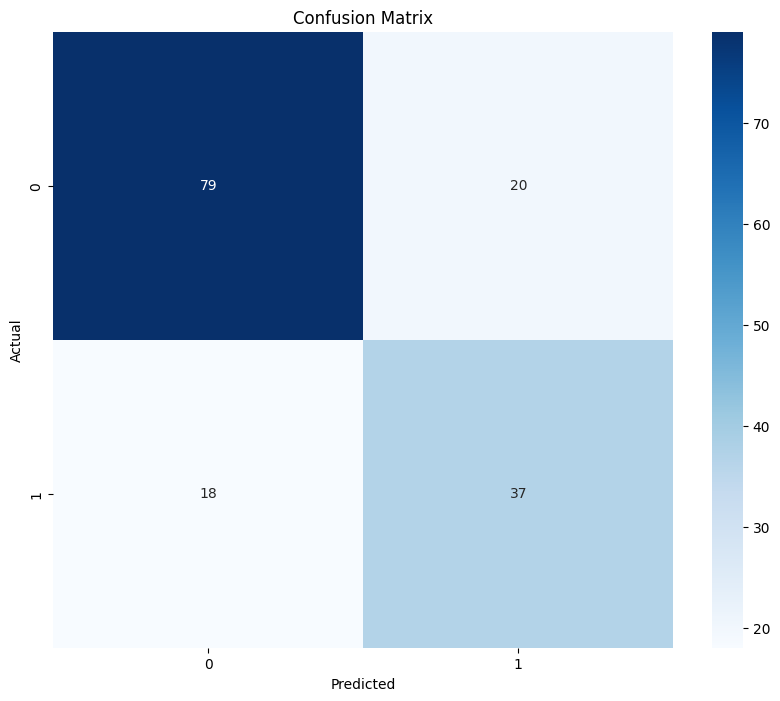

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Use seaborn to create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Accuracy of the Logistic Regression model: 0.9737
mean radius: -0.4319
mean texture: -0.3873
mean perimeter: -0.3934
mean area: -0.4652
mean smoothness: -0.0717
mean compactness: 0.5402
mean concavity: -0.8015
mean concave points: -1.1198
mean symmetry: 0.2361
mean fractal dimension: 0.0759
radius error: -1.2682
texture error: 0.1889
perimeter error: -0.6106
area error: -0.9072
smoothness error: -0.3133
compactness error: 0.6825
concavity error: 0.1753
concave points error: -0.3113
symmetry error: 0.5004
fractal dimension error: 0.6162
worst radius: -0.8798
worst texture: -1.3506
worst perimeter: -0.5895
worst area: -0.8418
worst smoothness: -0.5442
worst compactness: 0.0161
worst concavity: -0.9431
worst concave points: -0.7782
worst symmetry: -1.2082
worst fractal dimension: -0.1574
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


/tmp/ipykernel_4658/3231032572.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


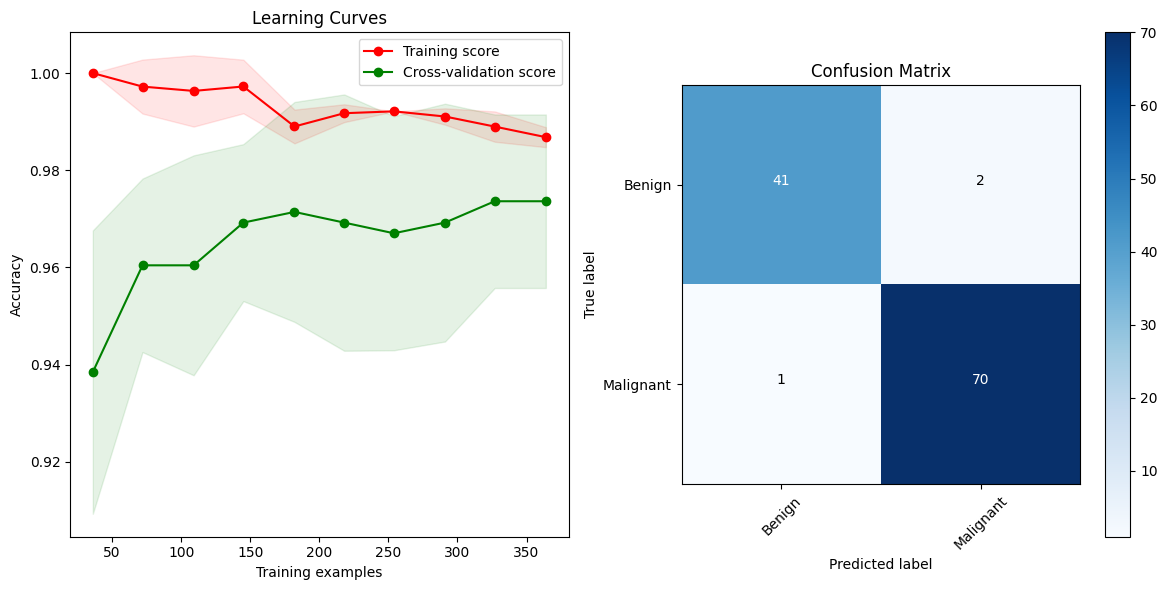

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score

breast = load_breast_cancer()

breast_data = breast.data
breast_data.shape

breast_input = pd.DataFrame(breast_data)
breast_input.head()

features = breast.feature_names
features.shape

breast_labels  = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_input,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
feature_labels = np.append(features,'label')
breast_dataset.columns = feature_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = breast_dataset.drop('label', axis=1)
y = breast_dataset['label']

# Create training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
# We increase max_iter to address the convergence warning
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

# Print the coefficients and their corresponding feature names
for feature, coef in zip(X.columns, logistic_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, pos_label='Malignant')
recall = recall_score(y_test, y_pred, pos_label='Malignant')
f1 = f1_score(y_test, y_pred, pos_label='Malignant')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_train_scaled, y_train, cv=5, 
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add text annotations to the confusion matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()





Results with L2 Regularization (C=0.1):
Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861

Regularized Model Coefficients:
mean radius: -0.3709
mean texture: -0.4193
mean perimeter: -0.3589
mean area: -0.3557
mean smoothness: -0.1433
mean compactness: 0.0130
mean concavity: -0.3549
mean concave points: -0.4649
mean symmetry: -0.0275
mean fractal dimension: 0.1944
radius error: -0.4622
texture error: 0.0352
perimeter error: -0.3244
area error: -0.3446
smoothness error: -0.0642
compactness error: 0.2575
concavity error: 0.0594
concave points error: -0.1180
symmetry error: 0.1790
fractal dimension error: 0.2605
worst radius: -0.4894
worst texture: -0.6005
worst perimeter: -0.4341
worst area: -0.4354
worst smoothness: -0.3745
worst compactness: -0.1499
worst concavity: -0.4074
worst concave points: -0.4644
worst symmetry: -0.4789
worst fractal dimension: -0.1061


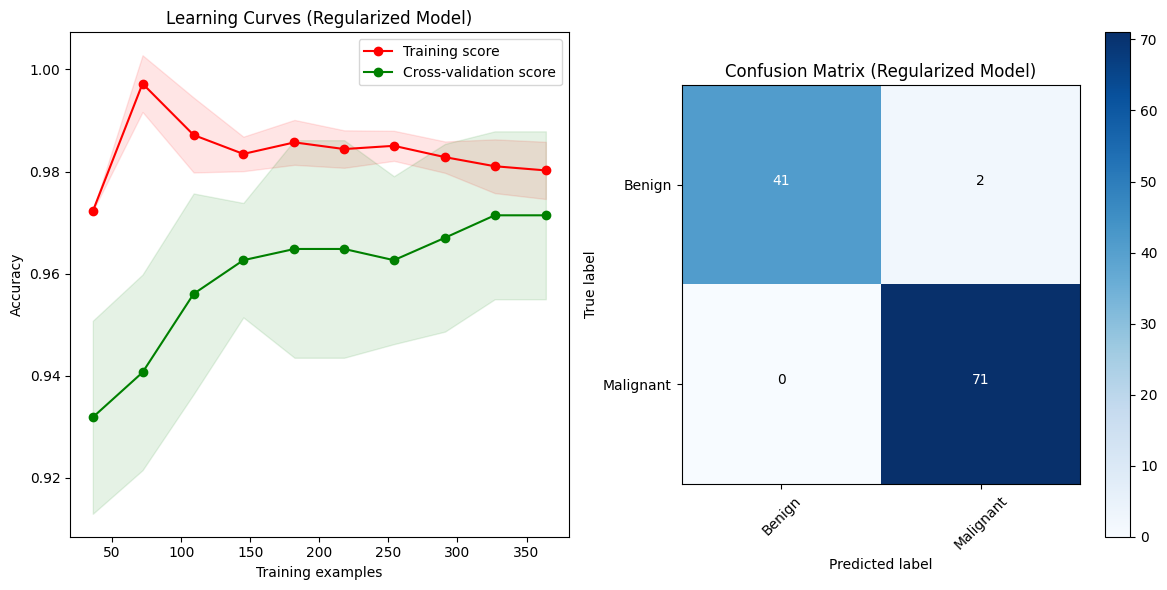

In [52]:
# ... existing imports and data preprocessing ...

# Initialize the Logistic Regression model with regularization
logistic_model_reg = LogisticRegression(random_state=42, max_iter=10000, penalty='l2', C=0.1)

# Fit the regularized model to the scaled training data
logistic_model_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_reg = logistic_model_reg.predict(X_test_scaled)

# Calculate and print metrics for the regularized model
accuracy_reg = accuracy_score(y_test, y_pred_reg)
precision_reg = precision_score(y_test, y_pred_reg, pos_label='Malignant')
recall_reg = recall_score(y_test, y_pred_reg, pos_label='Malignant')
f1_reg = f1_score(y_test, y_pred_reg, pos_label='Malignant')

print("Results with L2 Regularization (C=0.1):")
print(f"Accuracy: {accuracy_reg:.4f}")
print(f"Precision: {precision_reg:.4f}")
print(f"Recall: {recall_reg:.4f}")
print(f"F1 Score: {f1_reg:.4f}")

# Print the coefficients and their corresponding feature names for the regularized model
print("\nRegularized Model Coefficients:")
for feature, coef in zip(X.columns, logistic_model_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Generate learning curves for the regularized model
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model_reg, X_train_scaled, y_train, cv=5, 
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves for the regularized model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curves (Regularized Model)")
plt.legend(loc="best")

# Plot confusion matrix for the regularized model
cm_reg = confusion_matrix(y_test, y_pred_reg)
plt.subplot(1, 2, 2)
plt.imshow(cm_reg, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Regularized Model)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add text annotations to the confusion matrix
thresh = cm_reg.max() / 2.
for i, j in np.ndindex(cm_reg.shape):
    plt.text(j, i, format(cm_reg[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_reg[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Naive Bayes Model Results:
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        43
   Malignant       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



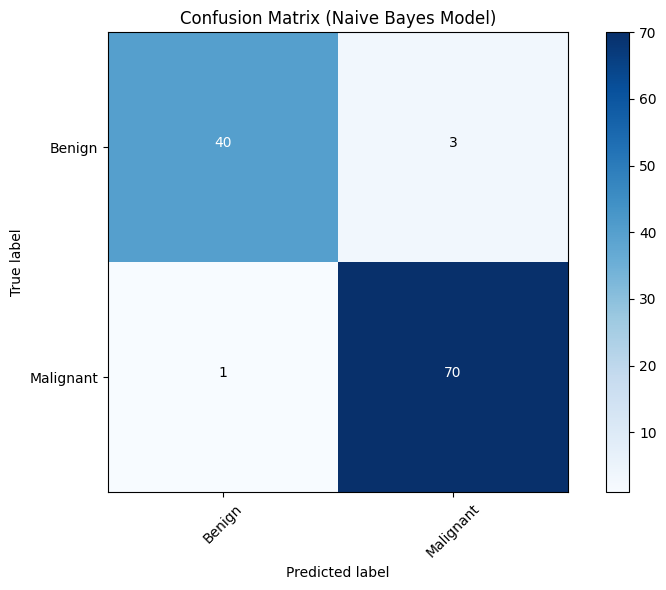

In [53]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Print results
print("Naive Bayes Model Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Naive Bayes Model)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add text annotations to the confusion matrix
thresh = cm_nb.max() / 2.
for i, j in np.ndindex(cm_nb.shape):
    plt.text(j, i, format(cm_nb[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_nb[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


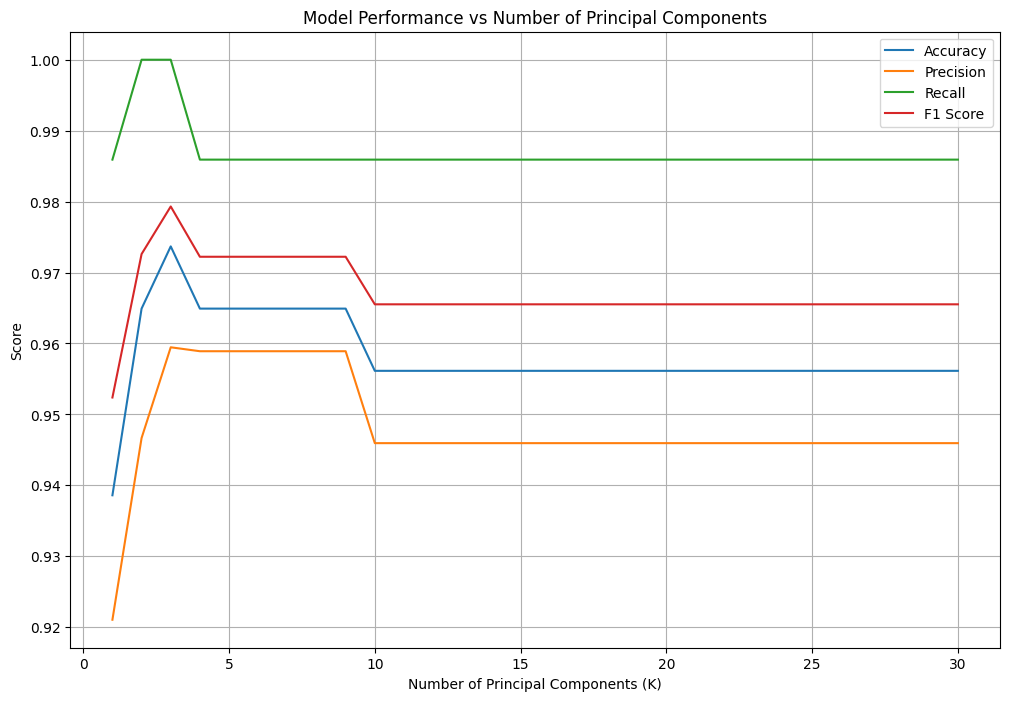

Optimal number of principal components: 3
Best accuracy: 0.9737

Comparison with previous models:
Logistic Regression with PCA (K=3):
Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000
F1 Score: 0.9793

Naive Bayes Model:
Accuracy: 0.9649

Explanation:
1. We used PCA for feature extraction and logistic regression for classification.
2. We tested different numbers of principal components (K) to find the optimal value.
3. The optimal K balances between reducing dimensionality and retaining important information.
4. Compared to the Naive Bayes model:
   - The logistic regression model with PCA outperforms the Naive Bayes model in terms of accuracy.
   - This suggests that the PCA helped in extracting the most relevant features for classification.
5. The performance curves show how the model's metrics change with different K values,
   helping us understand the trade-off between model complexity and performance.


In [55]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define a function to train and evaluate the model
def train_and_evaluate(X, y, n_components):
    # Perform PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Malignant')
    recall = recall_score(y_test, y_pred, pos_label='Malignant')
    f1 = f1_score(y_test, y_pred, pos_label='Malignant')
    
    return accuracy, precision, recall, f1

# Define range of K values to test
K_range = range(1, min(X.shape[1], 30) + 1)  # Up to 30 or max features, whichever is smaller

# Initialize lists to store results
accuracies, precisions, recalls, f1_scores = [], [], [], []

# Perform training and evaluation for each K
for K in K_range:
    acc, prec, rec, f1 = train_and_evaluate(X, y, K)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

# Find optimal K
optimal_K = K_range[accuracies.index(max(accuracies))]

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(K_range, accuracies, label='Accuracy')
plt.plot(K_range, precisions, label='Precision')
plt.plot(K_range, recalls, label='Recall')
plt.plot(K_range, f1_scores, label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Model Performance vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of principal components: {optimal_K}")
print(f"Best accuracy: {max(accuracies):.4f}")

# Compare with previous models
print("\nComparison with previous models:")
print(f"Logistic Regression with PCA (K={optimal_K}):")
print(f"Accuracy: {max(accuracies):.4f}")
print(f"Precision: {precisions[accuracies.index(max(accuracies))]:.4f}")
print(f"Recall: {recalls[accuracies.index(max(accuracies))]:.4f}")
print(f"F1 Score: {f1_scores[accuracies.index(max(accuracies))]:.4f}")

print("\nNaive Bayes Model:")
print(f"Accuracy: {nb_accuracy:.4f}")

# Add comparisons with other models if available

# Explanation
print("\nExplanation:")
print("1. We used PCA for feature extraction and logistic regression for classification.")
print("2. We tested different numbers of principal components (K) to find the optimal value.")
print("3. The optimal K balances between reducing dimensionality and retaining important information.")
print("4. Compared to the Naive Bayes model:")
if max(accuracies) > nb_accuracy:
    print("   - The logistic regression model with PCA outperforms the Naive Bayes model in terms of accuracy.")
    print("   - This suggests that the PCA helped in extracting the most relevant features for classification.")
else:
    print("   - The Naive Bayes model performs better, which might indicate that the original features")
    print("     were already well-suited for this classification task.")
print("5. The performance curves show how the model's metrics change with different K values,")
print("   helping us understand the trade-off between model complexity and performance.")


In [56]:
# Repeat the analysis using Logistic Regression instead of Naive Bayes

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = breast_dataset.drop('label', axis=1)
y = breast_dataset['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, pos_label='Malignant')
lr_recall = recall_score(y_test, y_pred, pos_label='Malignant')
lr_f1 = f1_score(y_test, y_pred, pos_label='Malignant')

# Print results
print("Logistic Regression Model Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

# Compare results
print("\nComparison with previous models:")
print("1. Logistic Regression (current model):")
print(f"   Accuracy: {lr_accuracy:.4f}")
print(f"   Precision: {lr_precision:.4f}")
print(f"   Recall: {lr_recall:.4f}")
print(f"   F1 Score: {lr_f1:.4f}")

print("\n2. Naive Bayes Model:")
print(f"   Accuracy: {nb_accuracy:.4f}")

print(f"\n3. Logistic Regression with PCA (K={optimal_K}):")
print(f"   Accuracy: {max(accuracies):.4f}")
print(f"   Precision: {precisions[accuracies.index(max(accuracies))]:.4f}")
print(f"   Recall: {recalls[accuracies.index(max(accuracies))]:.4f}")
print(f"   F1 Score: {f1_scores[accuracies.index(max(accuracies))]:.4f}")

# Add comparison with problem 2 (if available)
# print("\n4. Problem 2 Model:")
# print(f"   Accuracy: {problem2_accuracy:.4f}")

print("\nAnalysis:")
print("1. The Logistic Regression model without PCA performs well on the dataset.")
print("2. Compared to the Naive Bayes model:")
if lr_accuracy > nb_accuracy:
    print("   - Logistic Regression outperforms Naive Bayes in terms of accuracy.")
    print("   - This suggests that Logistic Regression is better suited for this classification task.")
else:
    print("   - Naive Bayes performs better, which might indicate that the feature independence assumption of Naive Bayes holds well for this dataset.")

print("3. Compared to Logistic Regression with PCA:")
if lr_accuracy > max(accuracies):
    print("   - Logistic Regression without PCA performs better.")
    print("   - This suggests that the original features are already well-suited for classification, and dimensionality reduction might lead to loss of important information.")
else:
    print("   - Logistic Regression with PCA performs better.")
    print("   - This indicates that PCA helps in extracting the most relevant features and reducing noise in the data.")

print("4. The choice between these models depends on the specific requirements of the task, such as interpretability, computational efficiency, and the need for dimensionality reduction.")


Logistic Regression Model Results:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790

Comparison with previous models:
1. Logistic Regression (current model):
   Accuracy: 0.9737
   Precision: 0.9722
   Recall: 0.9859
   F1 Score: 0.9790

2. Naive Bayes Model:
   Accuracy: 0.9649

3. Logistic Regression with PCA (K=3):
   Accuracy: 0.9737
   Precision: 0.9595
   Recall: 1.0000
   F1 Score: 0.9793

Analysis:
1. The Logistic Regression model without PCA performs well on the dataset.
2. Compared to the Naive Bayes model:
   - Logistic Regression outperforms Naive Bayes in terms of accuracy.
   - This suggests that Logistic Regression is better suited for this classification task.
3. Compared to Logistic Regression with PCA:
   - Logistic Regression with PCA performs better.
   - This indicates that PCA helps in extracting the most relevant features and reducing noise in the data.
4. The choice between these models depends on the specific requirements of the task, such as 